<a href="https://colab.research.google.com/github/WenHao1223/build_your_own_ai_workshops/blob/main/gdsc_beginner_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

The above code is to setup our libraries and setup how we report our data 

In [ ]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


Let us start to build our own AI Model!

In [ ]:
def build_model(learn_rate):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

  model.compile(optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate = learn_rate), 
                loss = "mean_squared_error", 
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model, df, feature, label, epochs, batch_size):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size = batch_size,
                      epochs = epochs)
  
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch 

  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]
  
  return trained_weight, trained_bias, epochs, rmse

What we are doing next will are to set up the functions required to plot our graphs to show how good each model does

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  


Next up, we will be setting up out batch size, learn_rate and epochs:

- Batch Size: The amount of rows of data that we feed into the model to train
- learn_rate: How much we will tune our loss functions
- Epochs: How many times will we train the model

Epoch 1/10
1700/1700 [==============================] - 3s 1ms/step - loss: 38206.9336 - root_mean_squared_error: 195.4659
Epoch 2/10
1700/1700 [==============================] - 2s 1ms/step - loss: 31673.2910 - root_mean_squared_error: 177.9699
Epoch 3/10
1700/1700 [==============================] - 2s 1ms/step - loss: 27549.0430 - root_mean_squared_error: 165.9790
Epoch 4/10
1700/1700 [==============================] - 5s 3ms/step - loss: 25446.7539 - root_mean_squared_error: 159.5204
Epoch 5/10
1700/1700 [==============================] - 4s 3ms/step - loss: 23727.9297 - root_mean_squared_error: 154.0387
Epoch 6/10
1700/1700 [==============================] - 4s 3ms/step - loss: 23162.2715 - root_mean_squared_error: 152.1916
Epoch 7/10
1700/1700 [==============================] - 6s 3ms/step - loss: 22976.4414 - root_mean_squared_error: 151.5798
Epoch 8/10
1700/1700 [==============================] - 5s 3ms/step - loss: 23162.5840 - root_mean_squared_error: 152.1926
Epoch 9/10
1700/

/usr/local/lib/python3.9/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


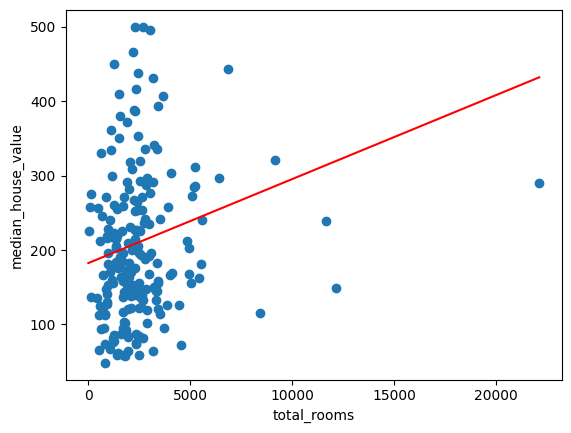

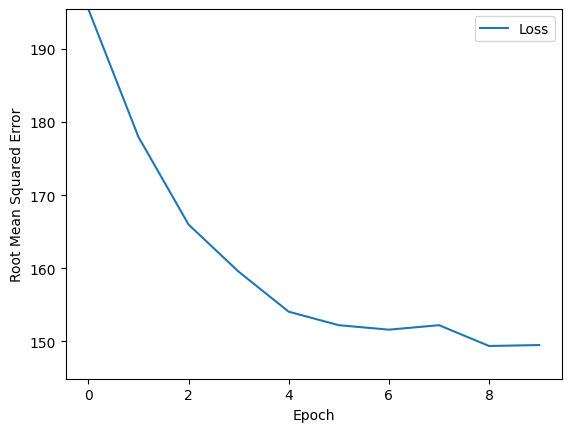

In [ ]:
learn_rate = 0.05 # Tune it here
epochs = 10 # Tune it here 
batch_size = 10 # Tune it here

my_feature = "total_rooms"
my_label = "median_house_value"

my_model = None

my_model = build_model(learn_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)


print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

This next function helps in predicing the house values based on the model that we have created. Note to see its accuracy in how good it does it

In [ ]:
def predict_house_values(n, feature, label):
  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             205
 3400     92             221
 3677     69             224
 2202     62             207
 2403     80             210
 5652    295             246
 3318    500             220
 2552    342             211
 1364    118             198
 3468    128             222


# Challenge!
Try to experiment and find which feature works best that would minimize our error the most! Top Scorers will receive some GDSC Swag! 

Epoch 1/30
567/567 [==============================] - 2s 3ms/step - loss: 8336.4688 - root_mean_squared_error: 91.3043
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 7050.1226 - root_mean_squared_error: 83.9650
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 7043.3955 - root_mean_squared_error: 83.9249
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 7048.2139 - root_mean_squared_error: 83.9536
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 7050.4316 - root_mean_squared_error: 83.9669
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 7050.6802 - root_mean_squared_error: 83.9683
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 7045.3701 - root_mean_squared_error: 83.9367
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 7036.6865 - root_mean_squared_error: 83.8850
Epoch 9/30
567/567 [============================

/usr/local/lib/python3.9/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


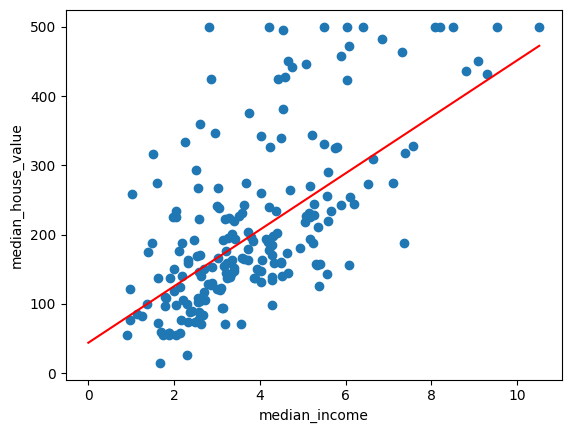

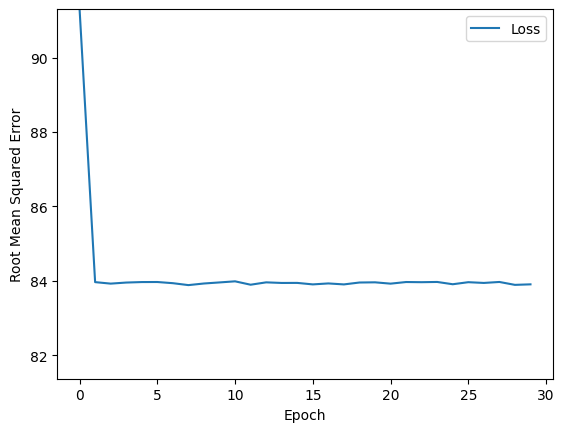

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             132
    4     92             207
    3     69             151
    2     62             130
    3     80             150
    2    295             145
   10    500             443
    5    342             253
    2    118             144
    4    128             215
    8    187             385
    3     80             159
    3    112             175
    4     95             216
    2     69             140


In [ ]:
my_feature = "median_income"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.737
epochs = 30
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)